### Tratamento do texto do campo DECISAO do dataset de Acórdãos rotulados

In [1]:
import os, signal

import pandas as pd
import pyperclip as pc
import texthero as hero
import modanez_tools as mt
import matplotlib.pyplot as plt

from datetime import datetime
# from utils import highlight_regex_matches as hl

In [2]:
# Configuração para mostrar todas as linhas de um dataframe
# pd.set_option('display.max_rows', None)

In [3]:
df_rotulados = mt.read_file('dados/df_rotulados.csv')
# df_rotulados.info()

Duration: 0:00:00.232109


In [4]:
# destaque = re.compile('LEI'+underscore+numerais+underscore, re.I)

# texto = df_rotulados.iloc[77].DECISAO
# texto = pa_sem_ponto.sub(re_sem_ponto, texto)

# texto = pa_lei.sub(re_lei, pa_decreto.sub(re_decreto, texto))
# texto = pa_inciso.sub(re_inciso, pa_paragrafo.sub(re_paragrafo, pa_artigo.sub(re_artigo, texto)))
# texto = pa_tcu.sub(re_tcu, pa_ritcu.sub(re_ritcu, texto))
# texto = pa_acpl.sub(re_acpl, pa_ac1c.sub(re_ac1c, pa_ac2c.sub(re_ac2c, pa_constituicao.sub(re_constituicao, texto))))
# texto = pa_depl.sub(re_depl, pa_de1c.sub(re_de1c, pa_de2c.sub(re_de2c, texto)))
# texto = pa_arpl.sub(re_arpl, pa_ar1c.sub(re_ar1c, pa_ar2c.sub(re_ar2c, texto)))
# texto = pa_transform_emails.sub(re_transform_emails, pa_transform_url.sub(re_transform_url, texto))
# texto = pa_remove_numr.sub(re_vazio, pa_punctuation.sub(re_vazio, pa_generico.sub(re_vazio, texto)))
# texto = pa_2caracter.sub(re_vazio, pa_hifens_numr.sub(re_vazio, texto))
# texto = pa_espacos.sub(re_espacos, texto)

# hl(destaque, pa_lei.sub(re_lei, texto))

In [5]:
# Aplicação do regex no texto do dataset dos etiquetados
start_time = datetime.now()
df_rotulados['PROCESSADO'] = df_rotulados.apply(lambda x: mt.padronizacao(x), axis = 1)
print('Duration: {}'.format(datetime.now() - start_time))

Duration: 0:02:16.986165


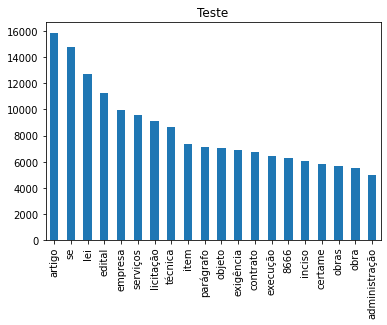

In [6]:
top_20 = hero.visualization.top_words(hero.remove_punctuation(df_rotulados.PROCESSADO)).head(20)

top_20.plot.bar(rot=90, title='Teste')

plt.show(block=True)

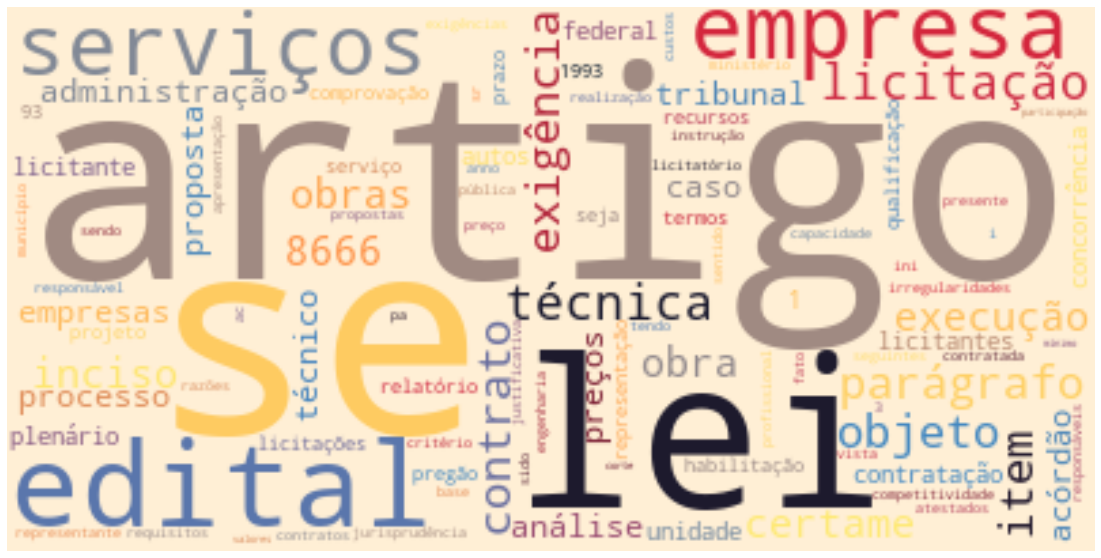

In [7]:
hero.wordcloud(hero.remove_punctuation(df_rotulados.PROCESSADO), max_words=100)

In [8]:
# pc.copy(df_rotulados.iloc[177].DECISAO)

In [9]:
df_rotulados = pd.DataFrame(df_rotulados.groupby(['ID', 'DECISAO'])['LABEL_A','LABEL_B', 'LABEL_C'].apply(lambda x: tuple(x.values)))
df_rotulados.reset_index(inplace=True)
df_rotulados = df_rotulados.rename(columns={0: 'LABELS'})

for index, row in df_rotulados.iterrows():
    df_rotulados.iloc[index].LABELS = ','.join([str(elem) for elem in df_rotulados.iloc[index].LABELS[0]])

new_cols = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']
new_vals = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
df_rotulados = df_rotulados.reindex(columns=df_rotulados.columns.tolist()+new_cols)
df_rotulados[new_cols] = new_vals

for index, row in df_rotulados.iterrows():
    labels = df_rotulados.iloc[index].LABELS.split(',')
    for i in range(0, 3):
        if int(labels[i])>0:
            df_rotulados.iloc[index, int(labels[i])+2] = 1

df_rotulados

<ipython-input-9-bb936c6fb9a7>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_rotulados = pd.DataFrame(df_rotulados.groupby(['ID', 'DECISAO'])['LABEL_A','LABEL_B', 'LABEL_C'].apply(lambda x: tuple(x.values)))


,ID,DECISAO,LABELS,1,2,3,4,5,6,7,8,9,10,11
0,AC-000035-2018-PL,"<p>VISTOS, relatados e discutidos estes autos ...","1,2,0",1,1,0,0,0,0,0,0,0,0,0
1,AC-000043-2008-PL,"Vistos, relatados e discutidos estes autos Rep...","7,0,0",0,0,0,0,0,0,1,0,0,0,0
2,AC-000103-2009-PL,"<p>VISTOS, relatados e discutidos estes autos ...","7,0,0",0,0,0,0,0,0,1,0,0,0,0
3,AC-000107-2009-PL,"<p class=""body_Text_Indent_3"">VISTOS, relatado...","2,0,0",0,1,0,0,0,0,0,0,0,0,0
4,AC-000111-2016-PL,"<p>VISTOS, relatados e discutidos estes autos ...","7,0,0",0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,DE-000512-2002-2C,"A Segunda Câmara, diante das razões expostas ...","7,0,0",0,0,0,0,0,0,1,0,0,0,0
326,DE-000681-1998-PL,"O Tribunal Pleno, diante das razões expostas ...","2,0,0",0,1,0,0,0,0,0,0,0,0,0
327,DE-000767-1998-PL,"O Tribunal Pleno, diante da razões exposta pe...","2,0,0",0,1,0,0,0,0,0,0,0,0,0
328,DE-001025-2001-PL,"O Tribunal Pleno, diante das razões expostas ...","5,0,0",0,0,0,0,1,0,0,0,0,0,0


In [10]:
# df_rotulados.drop(['DECISAO'], axis=1)
mt.save_file(df_rotulados.drop(['DECISAO', 'LABELS'], axis=1),'dados/df_rotulados_proc.csv')

Duration: 0:00:00.004854


In [ ]:
os.kill(os.getpid(), signal.SIGKILL)